# Model Comparison via PPP checking

An example of a model selection and model comparison involves the evidence for a presence of an emission line
in the X-ray spectra. The case study was presented by Protassov et al. (2002), "Statistics Handle with Care: Detecting Multiple Model Components with Likelihood Ratio Test"
https://ui.adsabs.harvard.edu/abs/2002ApJ...571..545P/abstract

This case was later studied in detail by Park et al, (2008), "Searching for Narrow Emission Lines in X-ray spectra: Computations and Methods" https://ui.adsabs.harvard.edu/abs/2008ApJ...688..807P/abstract


--------------------------------------------------------------

This notebook demonstrates the use of function `plot_pvalue` and it was run with Sherpa in CIAO 4.13

In [1]:
from sherpa.astro.ui import *

In [2]:
# load data and setup default statistics and optimization method
load_pha("qso.pi")
set_stat("cstat")
set_method("neldermead")


read ARF file qso.warf
read RMF file qso.wrmf
read ARF (background) file qso_bkg.warf
read RMF (background) file qso_bkg.wrmf
read background file qso_bkg.pi


In [3]:
#  Filter the data and set the model - note the models are given specific names 
#  for this session (abs1 and p1)
#  This is our 'null' model - basic model with no additional features
#
notice(0.3,8)
set_model("xsphabs.abs1*xspowerlaw.p1")

In [4]:
# Fit the model to the data using neldermead optimization algorithm
fit()

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 2.63644e+07
Final fit statistic   = 505.017 at function evaluation 550
Data points           = 528
Degrees of freedom    = 525
Probability [Q-value] = 0.727093
Reduced statistic     = 0.961937
Change in statistic   = 2.63639e+07
   abs1.nH        0.014202    
   p1.PhoIndex    1.27433     
   p1.norm        0.000201094 


In [5]:
# set the alternative model to include additional gaussian emission line (g1), freeze position of the line and fwhm
# and only fit the amplitude
#
set_model(abs1*(p1+gauss1d.g1))
g1.pos = 3.
freeze(g1.pos)
g1.fwhm=0.1
freeze(g1.fwhm)
fit()

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 2.05976e+06
Final fit statistic   = 502.283 at function evaluation 1110
Data points           = 528
Degrees of freedom    = 524
Probability [Q-value] = 0.745267
Reduced statistic     = 0.958556
Change in statistic   = 2.05925e+06
   abs1.nH        0.0131135   
   p1.PhoIndex    1.2779      
   p1.norm        0.000200283 
   g1.ampl        1.81517e-05 


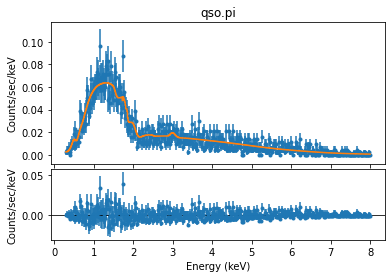

In [6]:
plot_fit_resid()

Likelihood Ratio Test
null statistic   =  505.0171364735527
alt statistic    =  502.28308851257947
likelihood ratio =  2.7340479609732142
p-value          =  0.106


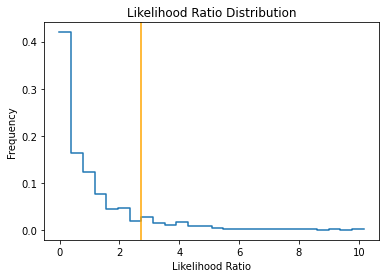

In [7]:
# plot_pvalue() - runs the simulations assuming the best fit parameters for the null model, fits the simulated data
# with the null and alternative model, calculates the likelihood ratio and plots the resulting distribution 
# and marks the observed likelihood ration on the resulting plot
# the summary of the simulations is printed to the screen

plot_pvalue(abs1*p1,abs1*(p1+g1),num=1000) 



In [8]:
results = get_pvalue_results()

In [9]:
print(results.samples[1:10])

[[-8.71796932e-03  1.23964894e+00  1.90739269e-04]
 [ 2.89190542e-02  1.30060816e+00  2.04648013e-04]
 [ 1.51040415e-02  1.27615122e+00  1.96126193e-04]
 [-2.72916847e-03  1.27000328e+00  1.99200237e-04]
 [ 9.16910053e-03  1.26044596e+00  1.97313533e-04]
 [ 2.83737050e-02  1.30227691e+00  2.05115073e-04]
 [ 4.55636321e-02  1.37352690e+00  2.18255586e-04]
 [ 2.20379981e-02  1.29314335e+00  2.07208567e-04]
 [ 5.13406978e-02  1.30676217e+00  2.17148774e-04]]


In [10]:
print(results.stats[1:10])

[[537.92461536 537.40282824]
 [541.74568063 540.61574847]
 [556.89873551 556.89720433]
 [582.12312805 579.72392231]
 [567.6435881  565.46582439]
 [543.01456678 540.88576469]
 [579.78142248 576.4408917 ]
 [545.72610495 545.68523547]
 [596.20448193 594.74696023]]


In [12]:
print(results.ratios[1:10])

[5.21787119e-01 1.12993216e+00 1.53118245e-03 2.39920573e+00
 2.17776371e+00 2.12880209e+00 3.34053078e+00 4.08694737e-02
 1.45752170e+00]
